In [1]:
import pandas as pa
import matplotlib.pyplot as pt
import numpy as np

In [2]:
sd=pa.read_csv("E:\ebooks CSE\datasets\KNNDataset.csv")

In [4]:
#sd

In [20]:
x=sd.iloc[:,1:11]
y=sd.iloc[:,-1]

In [23]:
#y

In [24]:
sd.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=89)

In [28]:
''' # Calculation for best random state
from sklearn.neighbors import KNeighborsClassifier
s=[]
for i in range(400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=KNeighborsClassifier().fit(x_train,y_train)
    s.append(lr.score(x_test,y_test))
    #J=ts_score.index(np.max(ts_score))
I=s.index(np.max(s))        '''

In [29]:
I

89

In [31]:
# Calculation for the best neighbour value
error=[]
for i in range(3,400,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y_test=knn.predict(x_test)
    error.append(np.mean(pred_y_test!=y_test))

Text(0, 0.5, 'Mean Error')

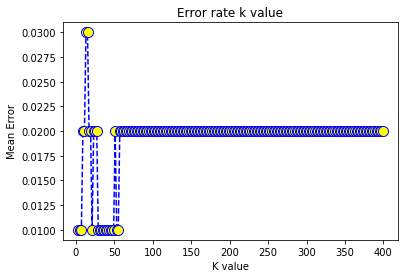

In [32]:
# Checking for best k value
pt.plot(range(3,400,2),error,color='blue',linestyle='dashed',marker='o',markersize=10,markerfacecolor='yellow')
pt.title('Error rate k value')
pt.xlabel('K value')
pt.ylabel('Mean Error')

In [33]:
# Putting the best K value in the function
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=45)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=45, p=2,
           weights='uniform')

In [35]:
y_pred=classifier.predict(x_test)

In [36]:
# Getting the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.99


In [37]:
# Final report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[45  1]
 [ 0 54]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        54

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

